In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans
import geopandas as gpd
np.set_printoptions(suppress=True)
import warnings
warnings.filterwarnings('ignore')

#

# Exploring the data 

In [2]:
data=pd.read_csv("Meteorite_Landings.csv")
data.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [3]:
data.shape

(45716, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,45716.0,26889.735104,16860.683030,1.00000,12688.75000,24261.50000,40656.75000,5.745800e+04
mass (g),45585.0,13278.078549,574988.876410,0.00000,7.20000,32.60000,202.60000,6.000000e+07
year,45425.0,1991.828817,25.052766,860.00000,1987.00000,1998.00000,2003.00000,2.101000e+03
reclat,38401.0,-39.122580,46.378511,-87.36667,-76.71424,-71.50000,0.00000,8.116667e+01
reclong,38401.0,61.074319,80.647298,-165.43333,0.00000,35.66667,157.16667,3.544733e+02


### Classification of columns

In [6]:
data.select_dtypes(include=['int64','float64'])

,id,mass (g),year,reclat,reclong
0,1,21.0,1880.0,50.77500,6.08333
1,2,720.0,1951.0,56.18333,10.23333
2,6,107000.0,1952.0,54.21667,-113.00000
3,10,1914.0,1976.0,16.88333,-99.90000
4,370,780.0,1902.0,-33.16667,-64.95000
...,...,...,...,...,...
45711,31356,172.0,1990.0,29.03700,17.01850
45712,30409,46.0,1999.0,13.78333,8.96667
45713,30410,3.3,1939.0,49.25000,17.66667
45714,31357,2167.0,2003.0,49.78917,41.50460


In [7]:
data.select_dtypes(include=['object','category'])

,name,nametype,recclass,fall,GeoLocation
0,Aachen,Valid,L5,Fell,"(50.775, 6.08333)"
1,Aarhus,Valid,H6,Fell,"(56.18333, 10.23333)"
2,Abee,Valid,EH4,Fell,"(54.21667, -113.0)"
3,Acapulco,Valid,Acapulcoite,Fell,"(16.88333, -99.9)"
4,Achiras,Valid,L6,Fell,"(-33.16667, -64.95)"
...,...,...,...,...,...
45711,Zillah 002,Valid,Eucrite,Found,"(29.037, 17.0185)"
45712,Zinder,Valid,"Pallasite, ungrouped",Found,"(13.78333, 8.96667)"
45713,Zlin,Valid,H4,Found,"(49.25, 17.66667)"
45714,Zubkovsky,Valid,L6,Found,"(49.78917, 41.5046)"


In [8]:
for i in data:
    print(f'''Column: {i}\n
data type of {i} : {data[i].dtypes}
number of unique values in {i} : {data[i].nunique()}
unique values in {i} : {data[i].unique()}
value counts in {i} : {data[i].value_counts()}
%age of values in {i} : {data[i].value_counts(normalize=True)*100}\n\n\n\n''')

Column: name

data type of name : object
number of unique values in name : 45716
unique values in name : ['Aachen' 'Aarhus' 'Abee' ... 'Zlin' 'Zubkovsky' 'Zulu Queen']
value counts in name : name
Aachen                    1
Northwest Africa 7459     1
Northwest Africa 7404     1
Northwest Africa 7407     1
Northwest Africa 7408     1
                         ..
Grove Mountains 052250    1
Grove Mountains 052253    1
Grove Mountains 052254    1
Grove Mountains 052256    1
Zulu Queen                1
Name: count, Length: 45716, dtype: int64
%age of values in name : name
Aachen                    0.002187
Northwest Africa 7459     0.002187
Northwest Africa 7404     0.002187
Northwest Africa 7407     0.002187
Northwest Africa 7408     0.002187
                            ...   
Grove Mountains 052250    0.002187
Grove Mountains 052253    0.002187
Grove Mountains 052254    0.002187
Grove Mountains 052256    0.002187
Zulu Queen                0.002187
Name: proportion, Length: 45716, dtype: 

After exploring the columns, we can conclude that all the features are correctly classified into numerical and categorical columns and there is no need for us to change the data type of any column.  

In [9]:
# checking for duplicates in 'id'

data[data['id'].duplicated()]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation


Also, we should set 'id' column as index as it is the unique identifier of each row.

In [10]:
data.set_index('id', inplace=True)

In [11]:
data.head(2)

,name,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
id,,,,,,,,,
1,Aachen,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
2,Aarhus,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"


In [12]:
cols=data.columns
num_cols=data.select_dtypes(include=['int64','float64'])
cat_cols=data.select_dtypes(include=['object','category'])

In [13]:
cols

Index(['name', 'nametype', 'recclass', 'mass (g)', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')

In [14]:
num_cols.columns

Index(['mass (g)', 'year', 'reclat', 'reclong'], dtype='object')

In [15]:
cat_cols.columns

Index(['name', 'nametype', 'recclass', 'fall', 'GeoLocation'], dtype='object')

#

# Visualizing Multicollinearity

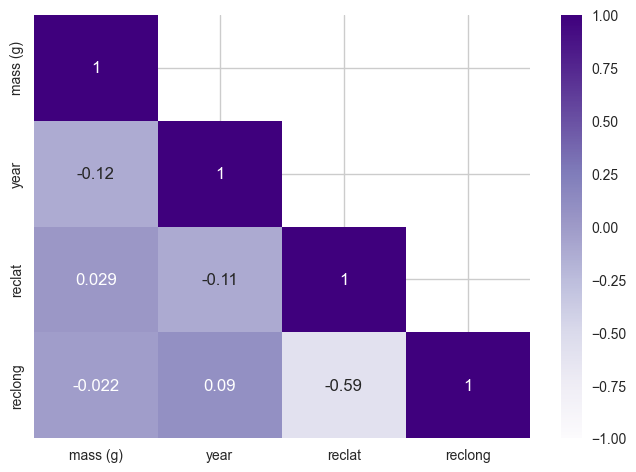

In [16]:
sns.heatmap(num_cols.corr(), vmin=-1, annot=True, cmap='Purples', mask= np.triu(num_cols.corr(), k=1))   
plt.show()

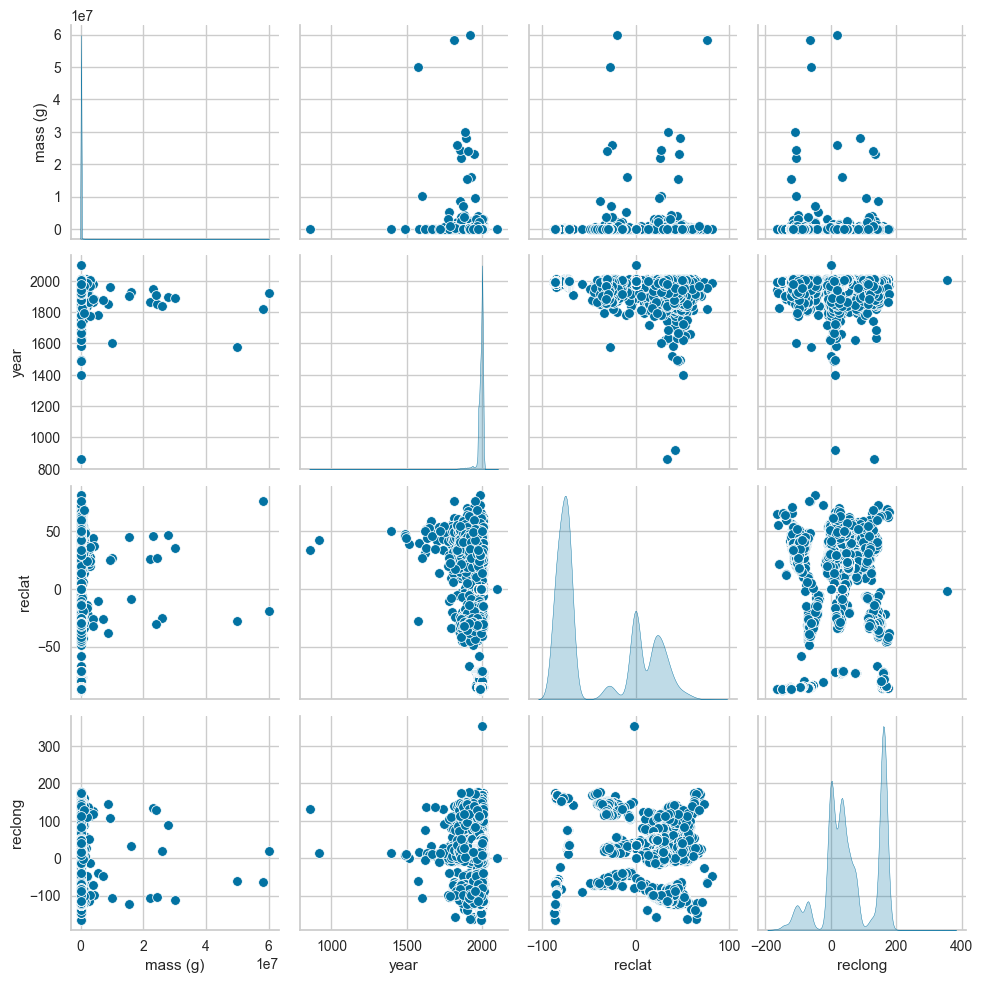

In [17]:
sns.pairplot(num_cols, diag_kind='kde') 
plt.show()

#

# Data Preprocessing

### Identifying duplicates

In [18]:
data[data.duplicated()]

,name,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
id,,,,,,,,,


No duplicates found.

### Identifying and treating the missing values

In [19]:
data.isnull().sum().sum()

22367

In [20]:
data.isnull().sum()

name              0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [21]:
# percentage of missing values in columns

data.isnull().sum()/data.shape[0]*100

name            0.000000
nametype        0.000000
recclass        0.000000
mass (g)        0.286552
fall            0.000000
year            0.636539
reclat         16.000962
reclong        16.000962
GeoLocation    16.000962
dtype: float64

In [22]:
# imputing values

imputer=SimpleImputer(strategy='mean')
data['mass (g)']=imputer.fit_transform(data[['mass (g)']])

We would impute values in year, reclat, reclong, geolocation columns after checking the outliers, as we have done below. 
Also imputing their values with their respective mode makes sense. 

In [23]:
imputer = SimpleImputer(strategy='most_frequent')

data['year']=imputer.fit_transform(data[['year']])

data['reclat']=imputer.fit_transform(data[['reclat']])

data['reclong']=imputer.fit_transform(data[['reclong']])

SimpleImputer.fit_transform() returns a 2D array, while Pandas expects a 1D series when assigning to a column.
So, lets convert it back to a Pandas Series.

In [24]:
data['GeoLocation'] = imputer.fit_transform(data[['GeoLocation']]).ravel()

In [25]:
data.isnull().sum()

name           0
nametype       0
recclass       0
mass (g)       0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

### Detecting and Treating Outliers

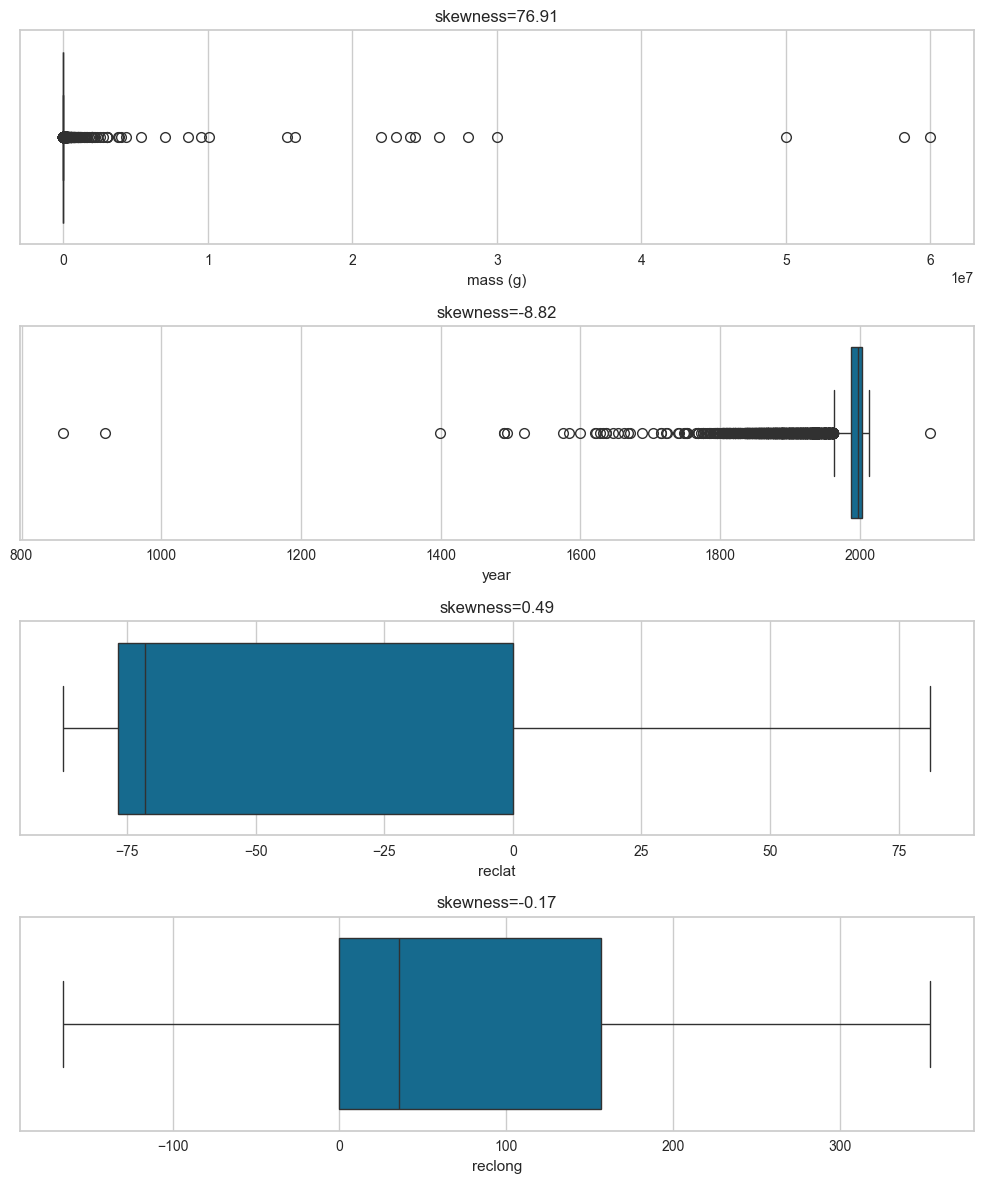

In [26]:
plt.figure(figsize=(10,12))
t=1
for i in num_cols:
    plt.subplot(4,1,t)
    sns.boxplot(num_cols, x=i)
    plt.title(f'skewness={round(num_cols[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

There is no need to treat the outliers present in the 'mass' column as the distribution of mass of meteors is essential for us to observe and take into consideration while analyzing. 
Also we dont need to treat outliers present in the year column and there are no outliers in 'reclat' and 'reclong' columns. 

### Feature Scaling

In [27]:
numeric_data=data.select_dtypes(include=np.number)
numeric_data

,mass (g),year,reclat,reclong
id,,,,
1,21.0,1880.0,50.77500,6.08333
2,720.0,1951.0,56.18333,10.23333
6,107000.0,1952.0,54.21667,-113.00000
10,1914.0,1976.0,16.88333,-99.90000
370,780.0,1902.0,-33.16667,-64.95000
...,...,...,...,...
31356,172.0,1990.0,29.03700,17.01850
30409,46.0,1999.0,13.78333,8.96667
30410,3.3,1939.0,49.25000,17.66667


As the numerical columns are on different scales, we need to do Feature Scaling. 

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
  
for i in num_cols:
    numeric_data[i]= scaler.fit_transform(numeric_data[[i]])

In [29]:
numeric_data

,mass (g),year,reclat,reclong
id,,,,
1,-0.023090,-4.478070,1.864393,-0.585504
2,-0.021872,-1.636755,1.984952,-0.531768
6,0.163234,-1.596736,1.941113,-2.127432
10,-0.019793,-0.636292,1.108903,-1.957809
370,-0.021768,-3.597662,-0.006778,-1.505266
...,...,...,...,...
31356,-0.022827,-0.076032,1.379824,-0.443912
30409,-0.023046,0.284135,1.039800,-0.548169
30410,-0.023120,-2.116977,1.830399,-0.435519


The data has been scaled.

#

#

# Determining optimal number of clusters

## K-Means Clustering

### K- Elbow plot

In [30]:
kelbow= KElbowVisualizer(estimator=KMeans(), k=8)

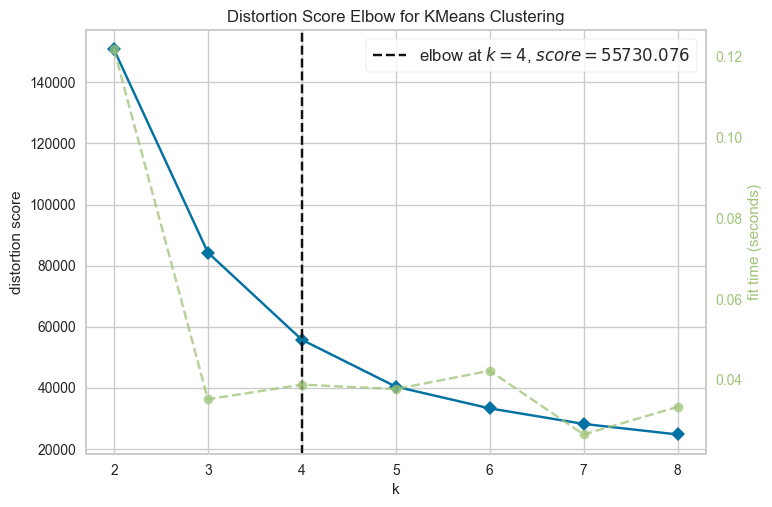

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
kelbow.fit(numeric_data)
kelbow.show()

The optimal number of clusters for the data is 4 as per the K Elbow Plot.

### Silhouette Visualizer

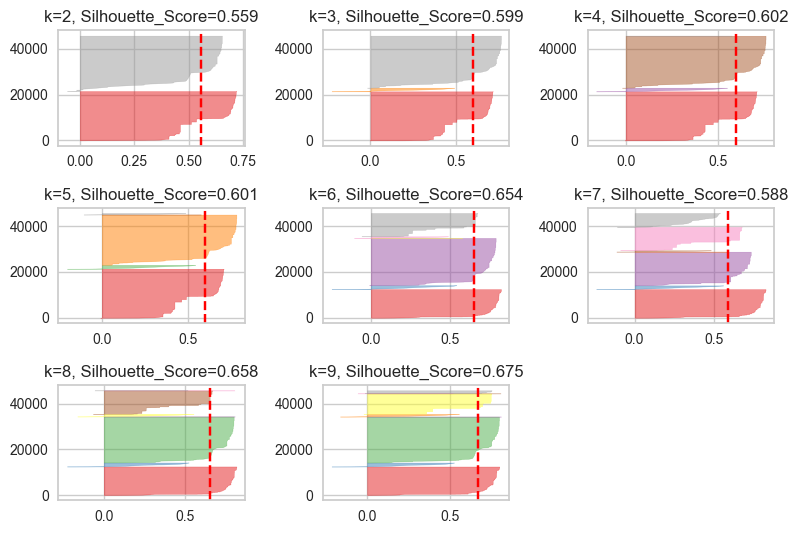

In [33]:
t=1
for i in range(2,10):
    plt.subplot(3,3,t)
    sil_viz= SilhouetteVisualizer(estimator=KMeans(n_clusters=i,random_state=2))
    sil_viz.fit(numeric_data)
    plt.title(f'k={i}, Silhouette_Score={round(sil_viz.silhouette_score_, 3)}')
    t+=1

plt.tight_layout()
plt.show()

Number of clusters that seems optimal according to Silhouette Visualizer is 4 with a good silhouette score.
So we will finalize k=4.

In [34]:
kmeans= KMeans(n_clusters=4)
label_kmeans= kmeans.fit_predict(numeric_data)

In [35]:
centroids= kmeans.cluster_centers_
centroids

array([[ 0.16204509, -3.99234168,  1.38129193, -0.91845118],
       [-0.02224836, -0.07984191, -0.94962245,  0.78995781],
       [-0.01693187,  0.35901828,  0.79783552, -0.68000133],
       [60.15193006, -5.63460534,  1.07630551, -0.74631735]])

#

# Visualizing Clusters

In [36]:
data['cluster']=label_kmeans
data

,name,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,cluster
id,,,,,,,,,,
1,Aachen,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",0
2,Aarhus,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",2
6,Abee,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",2
10,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",2
370,Achiras,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",0
...,...,...,...,...,...,...,...,...,...,...
31356,Zillah 002,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)",2
30409,Zinder,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)",2
30410,Zlin,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)",0


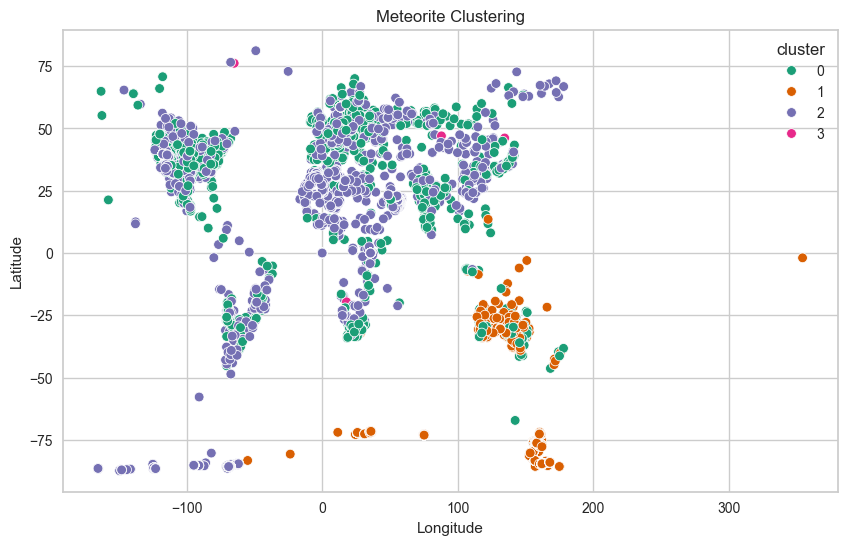

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['reclong'], y=data['reclat'], hue=data['cluster'], palette='Dark2')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Meteorite Clustering')
plt.show()

In [38]:
data[data['cluster']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
mass (g),1599.0,106317.592861,768978.249107,0.10000,1102.000000,5174.00000,22650.000000,1.600000e+07
year,1599.0,1892.137586,63.594596,860.00000,1872.000000,1905.00000,1931.000000,1.958000e+03
reclat,1599.0,29.102840,25.094333,-67.18333,26.733335,36.50000,43.800000,7.073333e+01
reclong,1599.0,-19.630247,81.804251,-163.16667,-97.749860,-8.58361,32.958335,1.780833e+02
cluster,1599.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000e+00


#### Inferences:

Mass (g): 
The average mass is 106,317.59 g (106 kg), but the standard deviation is extremely high (768,978.25 g), indicating a massive variation in values. The minimum mass is 0.1 g, while the maximum reaches 16 million g (16,000 kg), suggesting the presence of exceptionally large objects.

Year: 
The mean year is 1892, with values ranging from 860 to 1958, showing that these records span over a millennium.

Reclat (Latitude): 
The average latitude is 29.10, with values ranging from -67.18 (deep southern hemisphere) to 70.73 (far northern hemisphere), indicating a wide geographical distribution.

Reclong (Longitude): 
The mean longitude is -19.63, but values range from -163.17 to 178.08, covering almost the entire globe.


In [39]:
data[data['cluster']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
mass (g),21407.0,504.015981,11496.925879,0.00000,3.80000,13.19000,49.30000,888600.00000
year,21407.0,1989.906526,9.570658,1925.00000,1982.00000,1988.00000,1997.00000,2011.00000
reclat,21407.0,-75.465183,9.234671,-85.66667,-84.00000,-76.18333,-71.54694,13.51667
reclong,21407.0,112.314380,58.388709,-55.00000,35.66667,156.43778,161.34367,354.47333
cluster,21407.0,1.000000,0.000000,1.00000,1.00000,1.00000,1.00000,1.00000


#### Inferences:

Mass (g): 
The average mass is 504.02 g, but the standard deviation is 11,496.93 g, indicating extreme variation. The maximum mass is 888,600 g (888.6 kg), suggesting a few massive outliers.

Year: 
The mean year is 1989.91, with records spanning from 1925 to 2011, indicating that this dataset mostly contains recent observations.

Reclat (Latitude): 
The mean latitude is -75.47, with values ranging from -85.67 to 13.52, showing that most data points are concentrated in the southern hemisphere, possibly Antarctica.

Reclong (Longitude): 
The mean longitude is 112.31, with a broad range from -55.00 to 354.47, indicating data points spread widely across different longitudes.


In [40]:
data[data['cluster']==2].describe().T

,count,mean,std,min,25%,50%,75%,max
mass (g),22700.0,3556.358495,61487.852214,0.00000,15.557,82.3,382.100000,4.000000e+06
year,22700.0,2000.869119,9.386714,1944.00000,1998.000,2003.0,2006.000000,2.101000e+03
reclat,22700.0,2.927195,25.761167,-87.36667,0.000,0.0,19.246372,8.116667e+01
reclong,22700.0,-1.213520,41.208111,-165.43333,0.000,0.0,4.050000,1.782000e+02
cluster,22700.0,2.000000,0.000000,2.00000,2.000,2.0,2.000000,2.000000e+00


#### Inferences:

Mass (g): 
The average mass is 3,556.36 g (3.56 kg), but the standard deviation is extremely high (61,487.85 g), indicating significant variation. The maximum mass is 4,000,000 g (4,000 kg or 4 tons), suggesting large outliers.

Year: 
The mean year is 2000.87, with values ranging from 1944 to 2101, indicating that most records are modern and even predictive.

Reclat (Latitude): 
The average latitude is 2.93, with a spread from -87.37 to 81.17, meaning this dataset covers a broad geographic range, from the southernmost to northernmost regions.

Reclong (Longitude): 
The mean longitude is -1.21, with values spanning from -165.43 to 178.20, indicating global distribution.


In [41]:
data[data['cluster']==3].describe().T

,count,mean,std,min,25%,50%,75%,max
mass (g),10.0,3.455000e+07,1.523776e+07,2.200000e+07,2.407500e+07,2.700000e+07,4.500000e+07,6.000000e+07
year,10.0,1.851100e+03,1.048920e+02,1.575000e+03,1.840000e+03,1.877000e+03,1.907750e+03,1.947000e+03
reclat,10.0,1.542100e+01,3.820658e+01,-3.078333e+01,-2.402083e+01,2.660000e+01,4.338250e+01,7.613333e+01
reclong,10.0,-6.336332e+00,9.734084e+01,-1.110333e+02,-9.505833e+01,-2.133333e+01,7.050000e+01,1.346533e+02
cluster,10.0,3.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00


#### Inferences:
    
Mass (g): 
The average mass is 34.55 million g (34.55 tons), with a standard deviation of 15.24 million g (15.24 tons), indicating extremely large objects. The maximum recorded mass is 60 million g (60 tons).

Year: 
The mean year is 1851, with a wide range from 1575 to 1947, showing that this dataset includes historical records of large masses.

Reclat (Latitude): 
The mean latitude is 15.42, with values spanning from -30.78 to 76.13, indicating a diverse global distribution.

Reclong (Longitude): 
The mean longitude is -6.34, with values ranging from -111.03 to 134.65, suggesting global coverage but with concentrations in specific regions.


#

# Visualizing Clusters on a World Map

In [43]:
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")

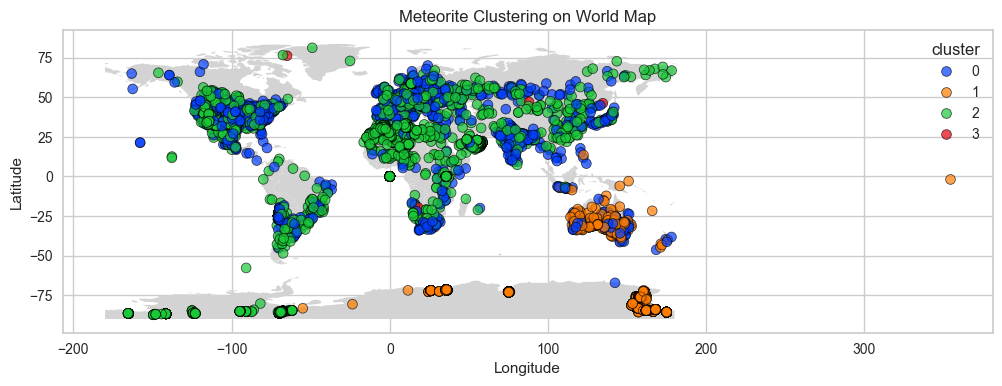

In [57]:
fig, ax = plt.subplots(figsize=(12, 6))

world.plot(ax=ax, color='lightgray')

sns.scatterplot(x=data['reclong'], 
                y=data['reclat'], 
                hue=data['cluster'], 
                palette='bright', 
                edgecolor='black', 
                alpha=0.7)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Meteorite Clustering on World Map')
plt.show()

#

# 🌍 Region-wise Interpretation of Meteorite Clusters
 
Based on the latitude (reclat) and longitude (reclong) distributions across clusters, we can infer potential regional patterns of meteorite landings.

#### Cluster 0: Large, Historical Meteorites
Mass: Very large (~106 kg mean, max 16 million grams).

Year: Older (~1892 mean).

Latitude: Spread across both hemispheres, but more negative values → suggests more meteorites in the Southern Hemisphere.

Longitude: Mixed, but with some extreme values, indicating global distribution.

Regional Interpretation:
Many of these meteorites might have been historically recorded in North America and Europe, where scientific documentation existed earlier.
The presence in South America & Africa suggests possible preservation in arid/desert regions (e.g., Sahara, Atacama).


#### Cluster 1: Small, Modern Meteorites
Mass: Small (~504 g mean, max ~888 kg).

Year: Most recent (~1989 mean).

Latitude: Balanced, with fewer extreme values → suggests more uniform global distribution.

Longitude: Moderate spread, no extreme values.

Regional Interpretation:
Evenly distributed across continents, likely due to advancements in detection technology worldwide.
Possible higher concentrations in urbanized or research-heavy regions (e.g., Europe, the US, Australia) where detection/reporting is better.
Lower mass suggests more frequent but smaller meteorites, possibly burning up before reaching the ground.


#### Cluster 2: Medium-sized, Recent Meteorites
Mass: Moderate (~3.5 kg mean, max ~4 million g).

Year: Modern (~2000 mean).

Latitude: Broad spread, but with some clustering in negative latitudes.

Longitude: Possible concentration in a specific longitude range.

Regional Interpretation:
Higher frequency in desert regions (Sahara, Australia, Atacama, Arabian Peninsula) where meteorites are easier to find.
South America & Africa might show higher representation due to increased meteorite recovery efforts in modern times.


#### Cluster 3: Massive, Rare, and Ancient Meteorites
Mass: Exceptionally massive (~34.5 million g mean, max ~60 million g).

Year: Very old (~1851 mean).

Latitude: Wide variance but concentrated at extreme values (likely in desert or polar regions).

Longitude: Highly dispersed but some high-density points.

Regional Interpretation:
High presence in Antarctica (where large meteorites are preserved in ice and easy to spot).
Deserts like the Sahara & Australia likely contribute due to low erosion & easy visibility.
Low recovery in dense forests (Amazon, Congo, Southeast Asia) due to rapid decay or difficult accessibility.


#

### Overall Regional Insights:
Urban & developed areas (North America, Europe, Australia): More recent and smaller meteorites (Cluster 1 & 2) due to better detection and reporting.

Desert regions (Sahara, Atacama, Arabia, Australia): Likely home to many preserved, medium to large meteorites (Cluster 2 & 3).

Polar regions (Antarctica): Ancient, large meteorites (Cluster 3) remain well-preserved in ice.

Dense forests & oceans: Underrepresented due to low detection & retrieval rate